In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

conf = SparkConf().setMaster("local").setAppName("NYC Taxi Fare")
conf.set("spark.executor.memory", "6G")
conf.set("spark.driver.memory", "2G")
conf.set("spark.executor.cores", "4")
conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
conf.set("spark.default.parallelism", "4")
spark_context =  SparkContext.getOrCreate(conf=conf)

spark_builder = SparkSession.builder.config(conf=conf)

spark = spark_builder.getOrCreate()

In [21]:
taxi_fare_df = spark.read.option("header", True).csv("data/combined.csv")

In [5]:
taxi_fare_df.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: string (nullable = true)
 |-- tpep_dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- trip_distance: string (nullable = true)
 |-- RatecodeID: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: string (nullable = true)
 |-- extra: string (nullable = true)
 |-- mta_tax: string (nullable = true)
 |-- tip_amount: string (nullable = true)
 |-- tolls_amount: string (nullable = true)
 |-- improvement_surcharge: string (nullable = true)
 |-- total_amount: string (nullable = true)
 |-- congestion_surcharge: string (nullable = true)



In [6]:
taxi_fare_df.head(5)

[Row(VendorID='1', tpep_pickup_datetime='2019-01-01 00:46:40', tpep_dropoff_datetime='2019-01-01 00:53:20', passenger_count='1', trip_distance='1.50', RatecodeID='1', store_and_fwd_flag='N', PULocationID='151', DOLocationID='239', payment_type='1', fare_amount='7', extra='0.5', mta_tax='0.5', tip_amount='1.65', tolls_amount='0', improvement_surcharge='0.3', total_amount='9.95', congestion_surcharge=None),
 Row(VendorID='1', tpep_pickup_datetime='2019-01-01 00:59:47', tpep_dropoff_datetime='2019-01-01 01:18:59', passenger_count='1', trip_distance='2.60', RatecodeID='1', store_and_fwd_flag='N', PULocationID='239', DOLocationID='246', payment_type='1', fare_amount='14', extra='0.5', mta_tax='0.5', tip_amount='1', tolls_amount='0', improvement_surcharge='0.3', total_amount='16.3', congestion_surcharge=None),
 Row(VendorID='2', tpep_pickup_datetime='2018-12-21 13:48:30', tpep_dropoff_datetime='2018-12-21 13:52:40', passenger_count='3', trip_distance='.00', RatecodeID='1', store_and_fwd_flag

In [7]:
taxi_fare_df.count()

124290082

In [11]:
import pandas as pd

taxi_fare_sample = pd.read_csv('data/sample.csv')

In [12]:
taxi_fare_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [10]:
import pyspark.sql.functions as F     


taxi_fare_df.agg(F.sum("total_amount")).collect()[0][0]

2349487913.4480224

In [21]:
# What not to do! I have 16 GBs of RAM on my Mac and this will not load

# Pandas does support `.chunksize`, but this exercise really shows the power of spark.

# taxi_df = pd.read_csv("data/combined.csv")

In [22]:
taxi_fare_df.groupBy("passenger_count").count().show(truncate=False)

+---------------+--------+
|passenger_count|count   |
+---------------+--------+
|7              |540     |
|3              |4992295 |
|8              |357     |
|0              |2333298 |
|5              |4507188 |
|6              |2752336 |
|9              |294     |
|1              |87092454|
|4              |2302735 |
|2              |18176524|
|null           |2132061 |
+---------------+--------+



In [23]:
taxi_fare_df[0]

Column<'VendorID'>

In [13]:
taxi_fare_df.first()

Row(VendorID='1', tpep_pickup_datetime='2019-01-01 00:46:40', tpep_dropoff_datetime='2019-01-01 00:53:20', passenger_count='1', trip_distance='1.50', RatecodeID='1', store_and_fwd_flag='N', PULocationID='151', DOLocationID='239', payment_type='1', fare_amount='7', extra='0.5', mta_tax='0.5', tip_amount='1.65', tolls_amount='0', improvement_surcharge='0.3', total_amount='9.95', congestion_surcharge=None)

In [16]:
taxi_fare_df.first().tpep_pickup_datetime

str

In [18]:
from pyspark.sql.functions import isnan, when, count, col

taxi_fare_df.select([count(when(isnan(c), c)).alias(c) for c in taxi_fare_df.columns]).show()

21/12/09 21:08:17 WARN TaskSetManager: Lost task 4.0 in stage 11.0 (TID 183) (macbook-pro executor driver): TaskKilled (Stage cancelled)


Py4JJavaError: An error occurred while calling o201.showString.
: org.apache.spark.SparkException: Job 9 cancelled 
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.handleJobCancellation(DAGScheduler.scala:2299)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2550)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2533)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2522)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)


In [23]:
import pyspark.sql.functions as F
pickup_null = taxi_fare_df.where(F.col('tpep_pickup_datetime').isNull())

In [28]:
pickup_null.count()

241864

In [33]:
taxi_fare_filtered = taxi_fare_df.where(F.col('tpep_pickup_datetime').isNotNull())

In [30]:
# Trying Spark SQL
taxi_fare_df.createOrReplaceTempView("TAXI")

In [32]:
spark.sql("SELECT * FROM TAXI where tpep_pickup_datetime IS NOT NULL").show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|              1|         1.50|         1|                 N|         151|         239|           1|          7|  0.5|    0.5|      1.65|           0|                  0.3

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|              1|         1.50|         1|                 N|         151|         239|           1|          7|  0.5|    0.5|      1.65|           0|                  0.3

In [39]:
from dateutil import parser

parser.parse(taxi_fare_df.first().tpep_pickup_datetime).strftime("%Y-%m")

'2019-01'

In [58]:
from dateutil import parser

taxi_fare_filtered = taxi_fare_filtered.withColumn("month", F.date_format(F.to_date(F.col("tpep_pickup_datetime")), "yyyy-MM"))

In [59]:
taxi_fare_filtered.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|  month|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|              1|         1.50|         1|                 N|         151|         239|           1|          7|  0.5|    0.5|      1.65|          

In [61]:
taxi_fare_grouped = taxi_fare_filtered.groupBy("month").count()

In [63]:
taxi_fare_grouped.show(100)

+-------+-------+
|  month|  count|
+-------+-------+
|2009-01|    603|
|2003-01|      8|
|2019-01|7667565|
|2008-12|    257|
|2018-11|     11|
|2018-12|    355|
|2019-02|7019184|
|2019-03|7832324|
|2019-07|6310376|
|2019-05|7565360|
|2019-08|6073089|
|2019-09|6567628|
|2019-06|6940798|
|2019-04|7433149|
|2001-02|      1|
|2088-01|      2|
|2038-02|      4|
|2002-12|      4|
|2041-03|      1|
|2008-08|      3|
|2033-04|      3|
|2019-10|7214110|
|2019-11|6877811|
|2001-01|      2|
|2020-01|6405286|
|2019-12|6896314|
|2002-02|     11|
|2010-08|      1|
|2020-02|6299567|
|2020-04| 237922|
|2020-06| 549794|
|2020-05| 348403|
|2020-07| 800437|
|2020-03|3006988|
|2015-11|      1|
|2029-11|      4|
|2058-12|      3|
|2090-12|      1|
|2066-12|      1|
|2026-12|      1|
|2021-01|1369760|
|2020-08|1007282|
|2020-11|1508900|
|2020-09|1340892|
|2020-10|1681266|
|2020-12|1461926|
|2021-02|1371695|
|2021-04|2171218|
|2021-06|2834205|
|2021-05|2507077|
|2003-03|      1|
|2021-03|1925130|
|2021-07|2

In [70]:
from datetime import datetime
from dateutil.rrule import rrule, MONTHLY

def months(start_month, start_year, end_month, end_year):
    start = datetime(start_year, start_month, 1)
    end = datetime(end_year, end_month, 1)
    return [(str(d.month).rjust(2, '0'), d.year) for d in rrule(MONTHLY, dtstart=start, until=end)]

months_in_dataset = months(1, 2019, 7, 2021)

months_in_dataset = [f"{year}-{month}" for month, year in months_in_dataset]
months_in_dataset

['2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07']

In [74]:
taxi_fare_filtered_remove_bad_dates = taxi_fare_filtered.filter(taxi_fare_filtered.month.isin(months_in_dataset))

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|  month|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-------+
|       1| 2019-01-01 00:46:40|  2019-01-01 00:53:20|              1|         1.50|         1|                 N|         151|         239|           1|          7|  0.5|    0.5|      1.65|          

In [76]:
taxi_fare_grouped = taxi_fare_filtered_remove_bad_dates.groupBy("month").count()

In [77]:
taxi_fare_grouped.show(50)

+-------+-------+
|  month|  count|
+-------+-------+
|2019-01|7667565|
|2019-02|7019184|
|2019-03|7832324|
|2019-07|6310376|
|2019-05|7565360|
|2019-08|6073089|
|2019-09|6567628|
|2019-06|6940798|
|2019-04|7433149|
|2019-10|7214110|
|2019-11|6877811|
|2020-01|6405286|
|2019-12|6896314|
|2020-02|6299567|
|2020-04| 237922|
|2020-06| 549794|
|2020-05| 348403|
|2020-07| 800437|
|2020-03|3006988|
|2021-01|1369760|
|2020-08|1007282|
|2020-11|1508900|
|2020-09|1340892|
|2020-10|1681266|
|2020-12|1461926|
|2021-02|1371695|
|2021-04|2171218|
|2021-06|2834205|
|2021-05|2507077|
|2021-03|1925130|
|2021-07|2821430|
+-------+-------+



In [83]:
taxi_fare_grouped_df = taxi_fare_grouped.toPandas()

In [92]:
import matplotlib.pyplot as plt
from dateutil import parser

taxi_fare_grouped_df['month_dt'] = pd.to_datetime(taxi_fare_grouped_df["month"])

taxi_fare_grouped_df

,month,count,month_dt
0,2019-01,7667565,2019-01-01
1,2019-02,7019184,2019-02-01
2,2019-03,7832324,2019-03-01
3,2019-07,6310376,2019-07-01
4,2019-05,7565360,2019-05-01
5,2019-08,6073089,2019-08-01
6,2019-09,6567628,2019-09-01
7,2019-06,6940798,2019-06-01
8,2019-04,7433149,2019-04-01
9,2019-10,7214110,2019-10-01


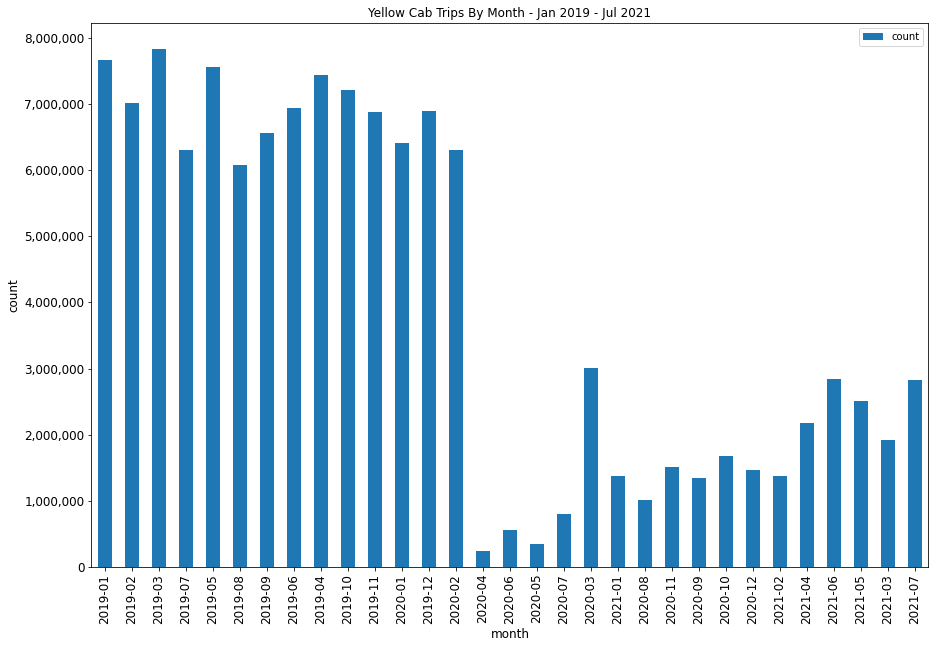

In [100]:
import matplotlib.pyplot as plt
import matplotlib

ax = taxi_fare_grouped_df[['month','count']].plot(kind='bar', title ="Yellow Cab Trips By Month - Jan 2019 - Jul 2021", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("month", fontsize=12)
ax.set_ylabel("count", fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(taxi_fare_grouped_df["month"])
plt.show()